<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des régions de confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy dans le fichier `src/cauchy.jl`). La spécification de cet algorithme est donnée dans le fichier.
2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du pas de Cauchy. Vous remplirez pour cela le fichier `test/tester_cauchy.jl` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [1]:
include("../src/cauchy.jl")         # votre algorithme
include("../test/tester_cauchy.jl") # la fonction pour tester votre algorithme

#
tester_cauchy(cauchy); # tester l'algorithme

Test Summary: | Pass  Total  Time
Pas de Cauchy |    4      4  0.4s


3. Coder l'algorithme des régions de confiance (fichier `src/regions_de_confiance.jl`). Sa spécification est donnée dans le fichier.
4. Vérifier que les tests ci-dessous passent.

In [2]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_cauchy.jl")

#
afficher = true # si true, alors affiche les résultats des algorithmes

#
tester_rc_cauchy(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : true

-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f1:
  * x0       = [1, 0, 0]
  * x_sol    = [1.0000065049853921, 1.000000873235793, 0.9999952414861938]
  * f(x_sol) = 7.71589405988668e-11
  * nb_iters = 33
  * flag     = 2
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [1.000003643199092, 0.9999997146801121, 0.9999957861612833]
  * f(x_sol) = 3.233185493810428e-11
  * nb_iters = 34
  * flag     = 2
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f2:
  * x0       = [-1.2, 1.0]
  * x_sol    = [0.999352919780472, 0.9987042941117394]
  * f(x_sol) = 4.19098603746544e-7
  * nb_iters = 5000
  * flag     = 3
  * solution = [1, 1]
------------------------

## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit la fonction $f_1 \colon \mathbb{R}^3 \to \mathbb{R}$ définie par
$$ 
    f_1(x_1,x_2, x_3) = 2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2
$$ 
Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de l'algorithme de Newton et celui des régions de confiance avec le pas de Cauchy sur cette fonction.

2. Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

## REPONSES

1 .
C'est la même fonction que pour Newton, f1 est déjà quadratique donc égale à son développement d'ordre 2.
Pour comparer Newton et régions de confiance, nous étudions seulement le nombre d'itérations (pour un même point initial) que donne chaque algorithme car c'est une bonne estimation de leur efficacité. (voir code ci-dessous)

On obtient bien la même solution (heureusement) mais on remarque que l'algorithme de Newton fini en 1 seule itération sur le flag de la condition d'arrêt CN1 tandis que l'algorithme des régions de confiance termine en 33 itérations sur le flag de la condition d'arrêt de stagnation de la fonction.
L'algorithme de Newton est donc bien plus efficace pour les fonctions quadratiques comme f1 puisque l'arrêt sera atteint en 1 itération au maximum.
Dans le cas des régions de confiance, même si la fonction est quadratique et qu'on utilise aussi une approximation de Taylor à l'ordre 2, la restriction à la  région de confiance ne permet par d'atteindre directement la solution, surtout si le rayon de celle-ci est petit.


2 .
Pour améliorer la vitesse de convergence de l'algorithme des régions de confiance, nous pouvons en particulier jouer sur les paramètres Δmax, γ1, γ2, η1 et η2 qui sont des seuils qui maîtrisent la mise à jour de l'itéré et la diminution ou l'augmentation de la région de confiance. Bien sûr tous les autres paramètres peuvent influencer sur la vitesse de convergence mais ce n'est pas spécialement leurs rôle, sauf peut être le point initial choisi qui pourrait être approximé à priori pour se placer directement proche d'une solution.

Nous choisissons d'étudier des variations de γ2 et γ1.

Pour γ2, nous avons choisis de calculer le nombre d'itération pour un point loin de la solution de la fonction fct1 ([1000; 100; 800]) et un Δmax grand pour favoriser l'augmentation de Δ (voir ligne 83 de l'implémentation des régions de confiance) et ainsi avoir une meilleure observation générale de l'influence de γ2. Ce qu'on peut remarquer c'est que l'augmentation de γ2 fait décroitre le nombre d'itérations et il semble y avoir une convergence vers 42 itérations environ. C'est normal car, en étant loin de la solution, on veut converger plus vite vers la solution et donc augmenter plus rapidement Δ. C'est bien à ça que sert le paramètre γ2, c'est le multiplicateur d'augmentation de la région de confiance.
De plus on remarque un pattern dans la courbe, il y a une forme pèriodique mais c'est compliqué d'y associer une signification. Cela dépend certainement de la forme de la fonction utilisée.

Pour γ1, il a fallu fixer les valeurs η2=1 et η1=1 ainsi qu'un point initial proche de la solution ([2; 1; 1]) pour pouvoir observer un comportement intéressant. En effet, il faut que l'algorithme passe souvent la condition ligne 84 pour diminuer la région de confiance et observer une courbe caractéristique. Ici, on remarque que l'augmentation de γ1 fait croître le nombre d'itérations drastiquement. C'est normal car, en étant proche de la solution, on veut garder une précision de convergence vers la solution et donc diminuer plus Δ. C'est bien à ça que sert le paramètre γ1, c'est le multiplicateur de diminution de la région de confiance.


In [ ]:
# Comparaison des performances Newton - Régions de confiance avec pas de Cauchy

include("../src/regions_de_confiance.jl")
include("../src/newton.jl")
include("../test/fonctions_de_tests.jl")

x_sol_newton, f_sol_newton, flag_newton, nb_iters_newton, _ = newton(fct1, grad_fct1, hess_fct1, pts1.x011)
x_sol_rc, f_sol_rc, flag_rc, nb_iters_rc, xs_rc = regions_de_confiance(fct1, grad_fct1, hess_fct1, pts1.x011, algo_pas="cauchy")

println("Comparaison des algorithmes de Newton et des régions de confiance avec pas de Cauchy sur f1 :")
println("Algorithme de Newton :")
println("  xsol = ", x_sol_newton)
println("  f_sol = ", f_sol_newton)
println("  flag = ", flag_newton)
println("  nb_iters = ", nb_iters_newton)
println("--------")
println("Algorithme des régions de confiance avec Cauchy :")
println("  xsol = ", x_sol_rc)
println("  f_sol = ", f_sol_rc)
println("  flag = ", flag_rc)
println("  nb_iters = ", nb_iters_rc)


Comparaison des algorithmes de Newton et des régions de confiance avec pas de Cauchy sur f1 :
Algorithme de Newton :
  xsol = [1.0, 1.0, 0.9999999999999999]
  f_sol = 1.232595164407831e-32
  flag = 0
  nb_iters = 1
--------
Algorithme des régions de confiance avec Cauchy :
  xsol = [1.0000065049853921, 1.000000873235793, 0.9999952414861938]
  f_sol = 7.71589405988668e-11
  flag = 2
  nb_iters = 33


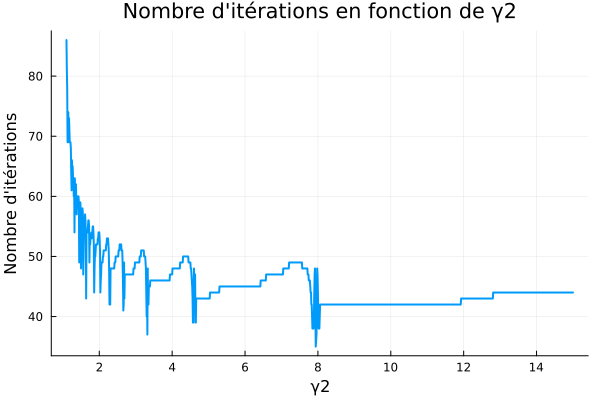

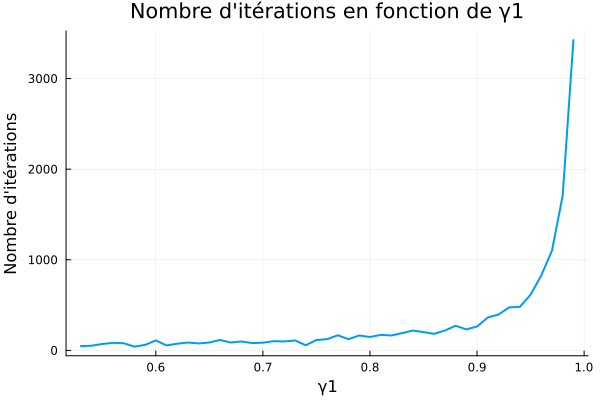

In [39]:
# Etude de l'influence des paramètres γ2 et γ1 dans les régions de confiance
using Plots
include("../src/regions_de_confiance.jl")
include("../test/fonctions_de_tests.jl")

function nb_iter_rc_γ2(γ2::Real)
    x_sol, f_sol, flag, nb_iters, xs = regions_de_confiance(fct1, grad_fct1, hess_fct1, [1000; 100; 800], algo_pas="cauchy", γ2=γ2, Δmax=10000)
    return nb_iters
end

function nb_iter_rc_γ1(γ1::Real)
    x_sol, f_sol, flag, nb_iters, xs = regions_de_confiance(fct1, grad_fct1, hess_fct1, [2; 1; 1], algo_pas="cauchy", γ1=γ1, η2=1, η1=1)
    return nb_iters
end

# plot pour la variation de γ2
γ2 = 1.1:0.01:15
iters = [nb_iter_rc_γ2(x) for x in γ2]
p = plot(
    γ2,
    iters,
    xlabel="γ2",
    ylabel="Nombre d'itérations",
    title="Nombre d'itérations en fonction de γ2",
    lw=2,
    legend=false
)
display(p)

# plot pour la variation de γ1
γ1 = 0.53:0.01:0.99
iters = [nb_iter_rc_γ1(x) for x in γ1]
p = plot(
    γ1,
    iters,
    xlabel="γ1",
    ylabel="Nombre d'itérations",
    title="Nombre d'itérations en fonction de γ1",
    lw=2,
    legend=false
)
display(p)


# Régions de confiance avec gradient conjugué tronqué

## Implémentation 

1. Implémenter l’algorithme du gradient conjugué tronqué (fichier `src/gct.jl`). Sa spécification est dans le fichier.
2. Vérifier que les tests ci-dessous passent.

In [9]:
include("../src/gct.jl")
include("../test/tester_gct.jl")

#
tester_gct(gct);

Test Summary:             | Pass  Total  Time
Gradient conjugué tronqué |    9      9  0.0s


3. Intégrer l’algorithme du gradient conjugué tronqué dans le code des régions de confiance.
4. Vérifier que les tests ci-dessous passent.

In [4]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_gct.jl")

#
afficher = true # si true, alors affiche les résultats des algorithmes

#
tester_rc_gct(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : true

-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f1:
  * x0       = [1, 0, 0]
  * x_sol    = [1.0000000000000007, 1.0, 1.0]
  * f(x_sol) = 2.0214560696288428e-30
  * nb_iters = 1
  * flag     = 0
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [1.0, 1.0, 1.0]
  * f(x_sol) = 0.0
  * nb_iters = 3
  * flag     = 0
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f2:
  * x0       = [-1.2, 1.0]
  * x_sol    = [0.999999674378009, 0.9999993478371609]
  * f(x_sol) = 1.0611413034983129e-13
  * nb_iters = 31
  * flag     = 0
  * solution = [1, 1]
-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f2:
  * x0   

## Interprétation  

Nous proposons de comparer l'utilisation du pas de Cauchy avec celle du gradient conjugué tronqué dans l'algorithme des régions de confiance.

**Remarques.**
* Nous vous demandons de réaliser des expérimentations numériques pour les comparaisons demandées ci-après.
* Vous devez utiliser l'argument optionnel `max_iter_gct` et la sortie `xs` de l'algorithme des régions de confiance.
* Vous pouvez comparer l'écart en norme entre les itérés de l'algorithme et la solution du problème.
* Vous trouverez des choses utiles dans le fichier `test/fonctions_de_tests.jl`.

1. Comparer dans le cas où l'on force le gradient conjugué tronqué à ne faire qu'une seule itération. Que remarquez vous ?
2. Comparer dans le cas général. Que remarquez vous ?
3. Quels sont les avantages et inconvénients des deux approches ?

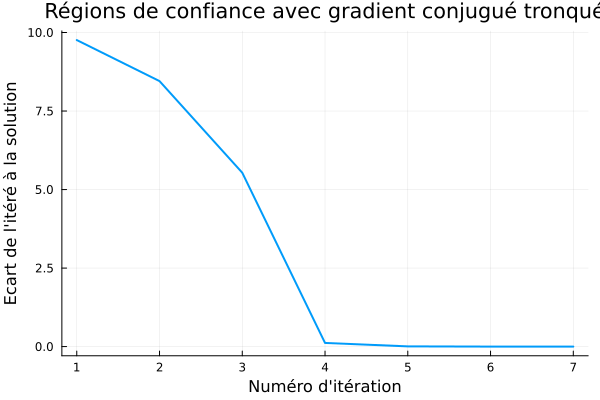

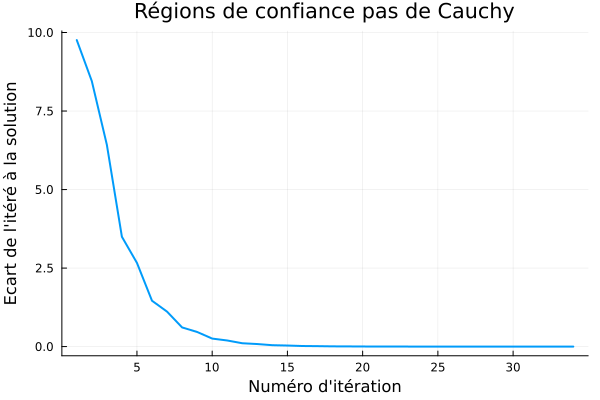

In [13]:
# 1. Comparaison lorsqu'on force le gradient conjugué à ne faire qu'une seule itération
using Plots
include("../src/regions_de_confiance.jl")
include("../test/fonctions_de_tests.jl")

x_sol, f_sol, flag, nb_iters, xs = regions_de_confiance(fct1, grad_fct1, hess_fct1, pts1.x012, algo_pas="gct", max_iter_gct=1)
iters = 1:1:nb_iters
ecarts = [norm(xs[i]-sol_exacte_fct1) for i in iters]
p = plot(
    iters,
    ecarts,
    xlabel="Numéro d'itération",
    ylabel="Ecart de l'itéré à la solution",
    title="Régions de confiance avec gradient conjugué tronqué",
    lw=2,
    legend=false
)
display(p)

x_sol, f_sol, flag, nb_iters, xs = regions_de_confiance(fct1, grad_fct1, hess_fct1, pts1.x012, algo_pas="cauchy")
iters = 1:1:nb_iters
ecarts = [norm(xs[i]-sol_exacte_fct1) for i in iters]
p = plot(
    iters,
    ecarts,
    xlabel="Numéro d'itération",
    ylabel="Ecart de l'itéré à la solution",
    title="Régions de confiance pas de Cauchy",
    lw=2,
    legend=false
)
display(p)

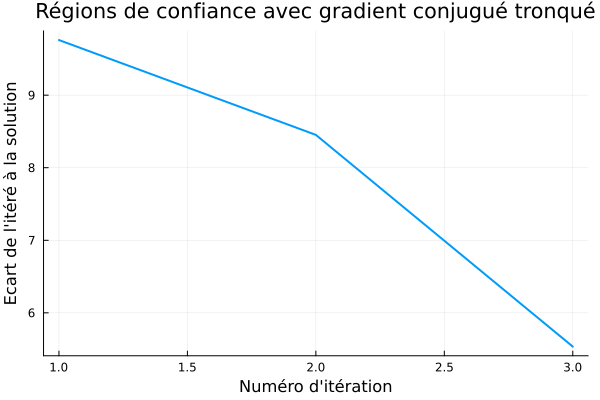

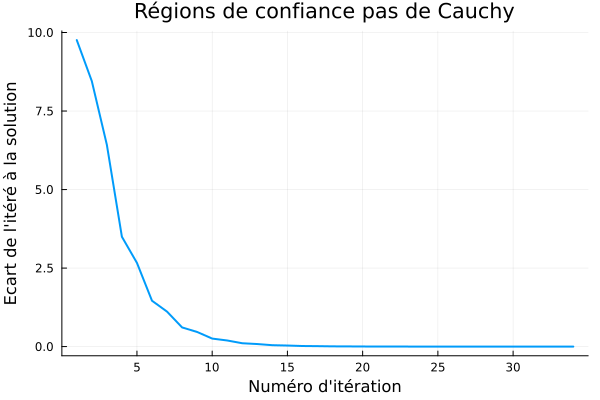

In [12]:
# 2. Comparaison dans le cas général
using Plots
include("../src/regions_de_confiance.jl")
include("../test/fonctions_de_tests.jl")

x_sol, f_sol, flag, nb_iters, xs = regions_de_confiance(fct1, grad_fct1, hess_fct1, pts1.x012, algo_pas="gct")
iters = 1:1:nb_iters
ecarts = [norm(xs[i]-sol_exacte_fct1) for i in iters]
p = plot(
    iters,
    ecarts,
    xlabel="Numéro d'itération",
    ylabel="Ecart de l'itéré à la solution",
    title="Régions de confiance avec gradient conjugué tronqué",
    lw=2,
    legend=false
)
display(p)

x_sol, f_sol, flag, nb_iters, xs = regions_de_confiance(fct1, grad_fct1, hess_fct1, pts1.x012, algo_pas="cauchy")
iters = 1:1:nb_iters
ecarts = [norm(xs[i]-sol_exacte_fct1) for i in iters]
p = plot(
    iters,
    ecarts,
    xlabel="Numéro d'itération",
    ylabel="Ecart de l'itéré à la solution",
    title="Régions de confiance pas de Cauchy",
    lw=2,
    legend=false
)
display(p)